In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
print(tf.__version__)

2.17.0


In [5]:
raw_dataset=pd.read_csv("DadasBIwithTOCClay_Tr.csv",sep=",")

In [6]:
DadasBIwithTOCClay_Tr = raw_dataset.copy()
DadasBIwithTOCClay_Tr.head()


,Well,BI,Depth_km,TOC_%,Clay_%
0,ABDULAZIZ-1,0.268545,2.739466,2.774167,69.648256
1,ABDULAZIZ-1,0.491041,2.750359,2.580821,50.325039
2,ABDULAZIZ-1,0.469750,2.757349,2.237459,52.216139
3,ABDULAZIZ-1,0.559872,2.778833,1.644551,43.005145
4,ABDULAZIZ-1,0.228969,2.787397,3.169991,76.123773


In [7]:
DadasBIwithTOCClay_Tr.shape

(595, 5)

In [8]:
DadasBIwithTOCClay_Tr.describe()

,BI,Depth_km,TOC_%,Clay_%
count,595.000000,595.000000,595.000000,595.000000
mean,0.539721,2.835952,4.317869,42.831862
std,0.143826,0.313520,2.918302,14.357979
min,0.228705,2.366726,1.041218,9.093319
25%,0.431186,2.428317,2.539709,31.640368
50%,0.550635,2.876561,3.413651,42.803543
75%,0.648568,3.057865,5.169872,52.153168
max,0.900609,3.365943,16.731755,76.123773


In [9]:
DadasBIwithTOCClay_Tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595 entries, 0 to 594
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Well      595 non-null    object 
 1   BI        595 non-null    float64
 2   Depth_km  595 non-null    float64
 3   TOC_%     595 non-null    float64
 4   Clay_%    595 non-null    float64
dtypes: float64(4), object(1)
memory usage: 23.4+ KB


<Figure size 10000x2500 with 0 Axes>

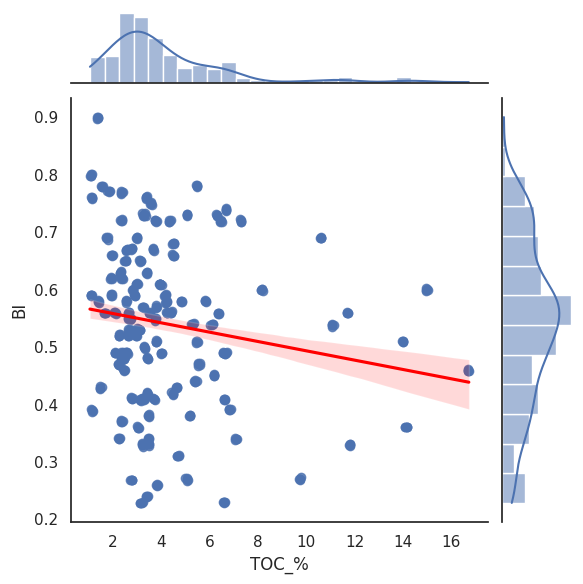

In [10]:
sns.set_theme(style="white")
plt.figure(figsize = (20,5), dpi = (500))
sns.jointplot(x = DadasBIwithTOCClay_Tr['TOC_%'], y = DadasBIwithTOCClay_Tr['BI'], kind='reg', line_kws={"color": "red"})
font_size =80

<Figure size 10000x2500 with 0 Axes>

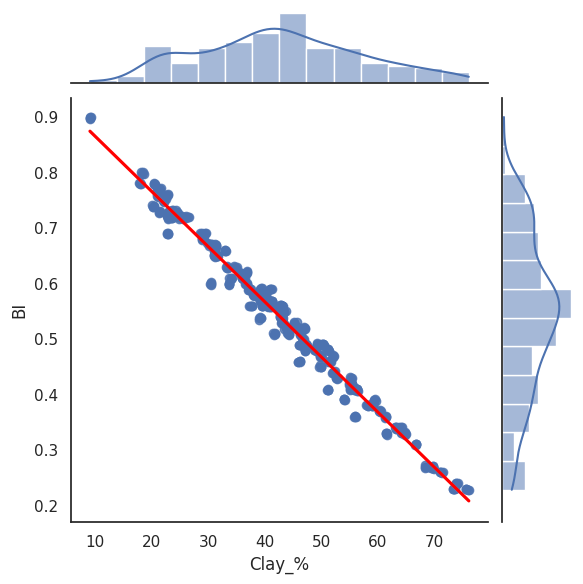

In [11]:
sns.set_theme(style="white")
plt.figure(figsize = (20,5), dpi = (500))
sns.jointplot(x = DadasBIwithTOCClay_Tr['Clay_%'], y = DadasBIwithTOCClay_Tr['BI'], kind='reg', line_kws={"color": "red"})
font_size =80

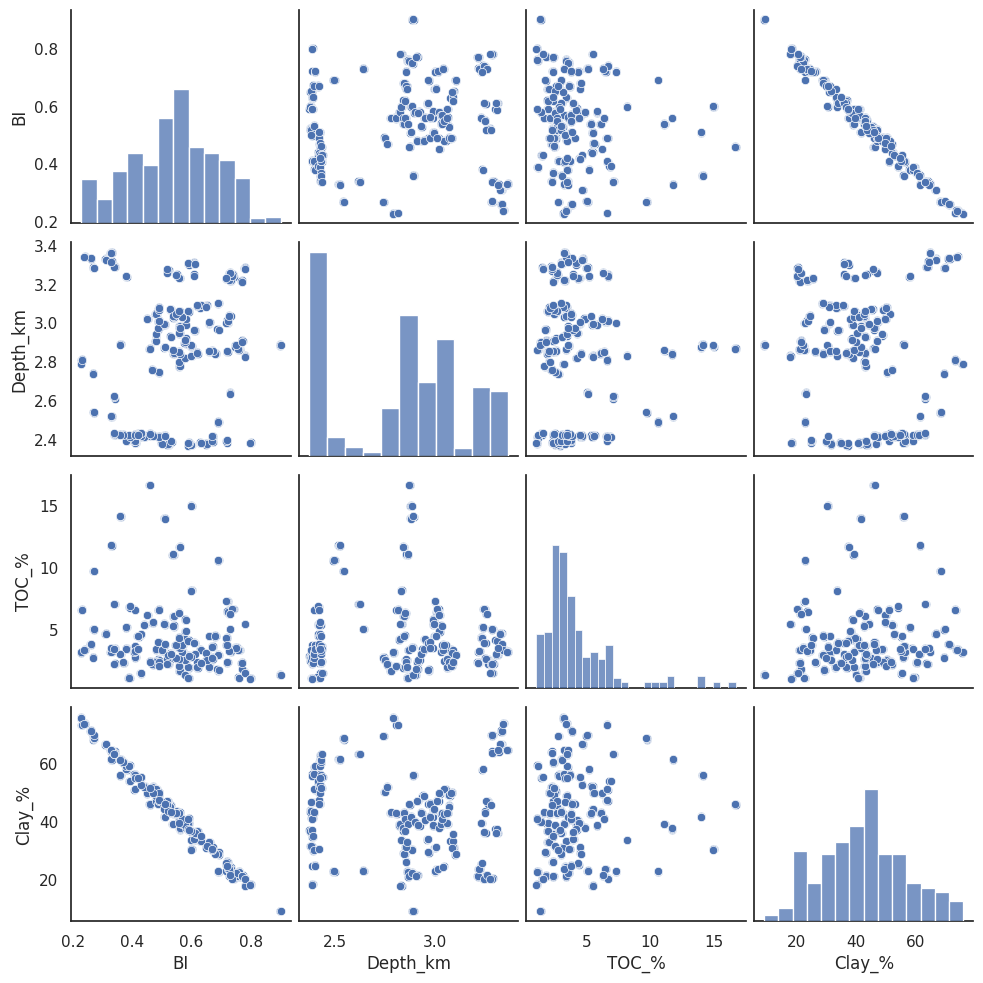

In [12]:
sns.pairplot(DadasBIwithTOCClay_Tr)


In [13]:
X = DadasBIwithTOCClay_Tr.iloc[:, 3:].values
y = DadasBIwithTOCClay_Tr.iloc[:,1].values


In [14]:
X

array([[ 2.77416681, 69.64825634],
       [ 2.58082107, 50.32503871],
       [ 2.23745887, 52.21613911],
       ...,
       [ 3.31364349, 55.19971778],
       [ 1.52065149, 55.32809036],
       [ 3.40940286, 54.97401889]])

In [15]:
y

array([0.26854453, 0.49104062, 0.46975022, 0.55987233, 0.22896929,
       0.55737822, 0.22937266, 0.5761973 , 0.60046757, 0.56012385,
       0.54001808, 0.5584867 , 0.54097938, 0.46147392, 0.50906957,
       0.59881377, 0.36041619, 0.69044585, 0.57806196, 0.72256416,
       0.72039045, 0.57955919, 0.56990019, 0.73029117, 0.47872751,
       0.58968007, 0.52770282, 0.62862608, 0.64770457, 0.68935481,
       0.58118741, 0.47981522, 0.58271403, 0.53055321, 0.47935696,
       0.55967891, 0.60861065, 0.48985766, 0.55961483, 0.50926516,
       0.66093004, 0.48944941, 0.45065436, 0.54033111, 0.5695267 ,
       0.54879985, 0.55991245, 0.48750083, 0.4898772 , 0.61944648,
       0.78234528, 0.68189565, 0.62058003, 0.66916058, 0.72106178,
       0.65996406, 0.75987688, 0.76221528, 0.75207575, 0.89883689,
       0.77145748, 0.69155599, 0.33148756, 0.27324527, 0.34061783,
       0.73123916, 0.77072612, 0.72977266, 0.55953734, 0.73806561,
       0.73035022, 0.26785911, 0.5909861 , 0.31053468, 0.25848

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() # Create an instance of StandardScaler
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
X_train

array([[ 3.64096781e-02, -2.52744186e-01],
       [-3.16912274e-01,  2.18129025e+00],
       [-1.11124254e+00, -1.31862919e-01],
       [-6.45862588e-01,  4.43840902e-01],
       [ 9.74377199e-01,  1.44510513e+00],
       [-1.01861500e+00, -2.39365757e+00],
       [-1.17832218e-01, -4.87960942e-01],
       [-2.80089094e-01,  1.42065988e+00],
       [-3.52367059e-01, -1.36363400e+00],
       [-6.57881476e-01,  1.21169795e+00],
       [ 8.29447179e-01, -1.61877391e+00],
       [-3.19288389e-01, -1.55472899e+00],
       [-5.09705398e-01, -4.61742858e-01],
       [ 5.31459547e-01, -3.08261450e-01],
       [-5.88590685e-01,  5.28037078e-01],
       [ 2.57907835e+00, -3.99810017e-01],
       [-4.22307630e-01, -8.40891823e-01],
       [ 4.07570501e-01,  6.43975477e-01],
       [ 6.78021188e-02,  8.79803692e-01],
       [-4.44227814e-01,  8.84149087e-03],
       [-1.02775990e+00, -2.39090024e+00],
       [ 2.19877943e+00, -1.42636633e+00],
       [-3.22150814e-01,  2.16889242e+00],
       [-1.

In [19]:
X_test

array([[ 4.09331392e-01, -1.76920076e+00],
       [ 4.34075288e-01,  4.99590308e-01],
       [-9.43773581e-02,  2.35100281e-01],
       [-6.11938003e-01, -3.01420389e-01],
       [-6.12809043e-01, -3.06954492e-01],
       [ 6.64902056e-01,  4.85004050e-01],
       [-6.03705217e-01,  5.19619802e-01],
       [-1.10307472e+00, -1.42322162e+00],
       [-4.56475956e-01, -9.94618767e-01],
       [-6.63070960e-01, -5.09797039e-01],
       [-9.37364059e-01, -1.59154694e+00],
       [-7.72930118e-01, -2.23867430e-02],
       [ 7.91211024e-01,  2.85834313e-01],
       [-2.76414966e-01,  1.49390554e+00],
       [-3.47109019e-01,  2.57502915e-01],
       [-6.72715643e-01, -1.15892069e+00],
       [-1.10092102e+00, -1.44953899e+00],
       [-9.76396619e-02, -6.28784007e-01],
       [-6.53917524e-01,  4.37307276e-01],
       [ 8.94664808e-01,  7.86827229e-01],
       [ 3.99114551e-01,  8.41958470e-02],
       [-1.27699378e-02, -1.77013187e-01],
       [-5.20414884e-01,  9.36191748e-01],
       [ 4.

In [20]:
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model

In [21]:
input_layer = Input(shape=(X.shape[1],))
dense_layer_1 = Dense(512, activation='relu')(input_layer)
dense_layer_2 = Dense(256, activation='relu')(dense_layer_1)
dense_layer_3 = Dense(128, activation='relu')(dense_layer_2)
dense_layer_4 = Dense(64, activation='relu')(dense_layer_3)
dense_layer_5 = Dense(64,activation='relu')(dense_layer_3)
output = Dense(1)(dense_layer_5)
model = Model(inputs=input_layer, outputs=output)
model.compile(loss="mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])

In [23]:
my_model = model

In [24]:
my_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 2)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 174,081 (680.00 KB)

 Trainable params: 174,081 (680.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, batch_size=2, epochs=500, verbose=1, validation_split=0.2)

Epoch 1/500
178/178 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.0656 - mean_squared_error: 0.0656 - val_loss: 0.0024 - val_mean_squared_error: 0.0024
Epoch 2/500
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0015 - mean_squared_error: 0.0015 - val_loss: 1.7459e-04 - val_mean_squared_error: 1.7459e-04
Epoch 3/500
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.4087e-04 - mean_squared_error: 2.4087e-04 - val_loss: 0.0014 - val_mean_squared_error: 0.0014
Epoch 4/500
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0024 - mean_squared_error: 0.0024 - val_loss: 1.2929e-04 - val_mean_squared_error: 1.2929e-04
Epoch 5/500
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.1353e-04 - mean_squared_error: 1.1353e-04 - val_loss: 3.2264e-04 - val_mean_squared_error: 3.2264e-04
Epoch 6/500
178/178 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 5.6734e-04 - mean_squared_error: 5.6734e-04 - val_loss: 1.9106e-04 - val_mean_squared_error: 1.9106e-04
Epoch 7/500
178/178 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/st

<Figure size 10000x2500 with 0 Axes>

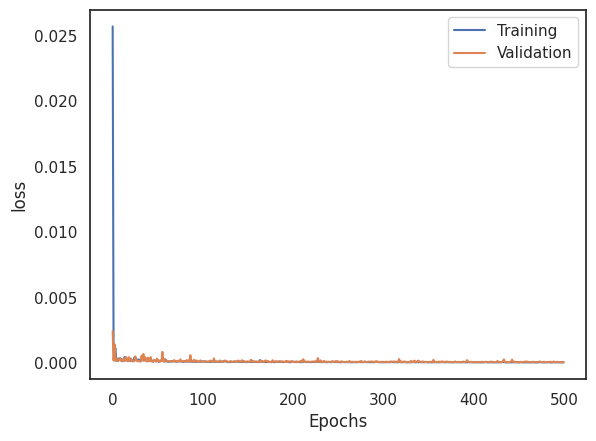

<Figure size 10000x2500 with 0 Axes>

In [26]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend(["Training","Validation"])
plt.figure(figsize = (20,5), dpi = (500))

In [27]:
predictions = model.predict(X_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(predictions)[:10])
print('Actual labels : ' ,y_test[:10])

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Predicted labels:  [[1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]]
Actual labels :  [0.77914556 0.46786122 0.48928476 0.57768949 0.5811524  0.45053414
 0.49237042 0.76188876 0.68812596 0.61982061]


In [28]:
from sklearn.metrics import r2_score

y_true = np.array(y_test)
y_pred = np.array(predictions)

r2 = r2_score(y_true, y_pred)
print(r2)


0.9988429959897681


<Figure size 15000x2500 with 0 Axes>

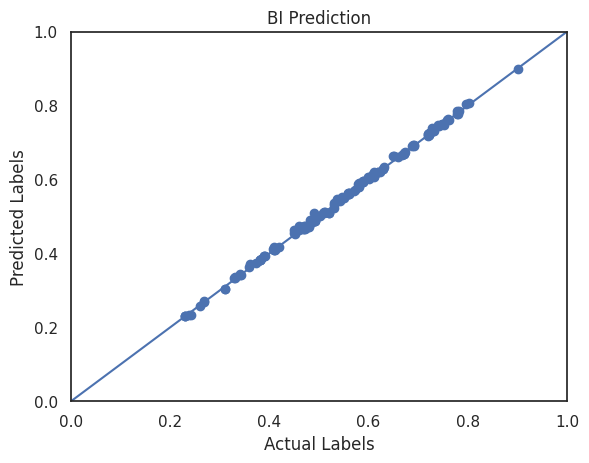

<Figure size 15000x2500 with 0 Axes>

In [29]:
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('BI Prediction')
lims = [0, 1]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)
plt.figure(figsize = (30,5), dpi = (500))

In [39]:
my_model = model


In [40]:

model.save('my_model.h5')




In [41]:
import tensorflow as tf


model = tf.keras.models.load_model('my_model.h5')


my_model = model

In [42]:
import tensorflow as tf
import pandas as pd
raw_dataset=pd.read_csv("DadasBIwithTOCClay_Pr.csv",sep=",")

In [43]:
DadasBIwithTOCClay_Pr = raw_dataset.copy()
DadasBIwithTOCClay_Pr.head()

,Well,Depth_km,TOC_%,Clay_%
0,Akcay_1,3.675,2.88,50
1,Akcay_1,3.680,2.44,51
2,Akcay_1,3.685,3.07,28
3,Akcay_1,3.690,4.80,46
4,Akcay_1,3.695,5.39,50


In [44]:
X_new =DadasBIwithTOCClay_Pr.iloc[:, 2:].values

In [ ]:
X_new

In [45]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

# Fit the scaler to your data
sc.fit(X_new)

# Transform your data
X_new = sc.transform(X_new)


In [46]:
X_new

array([[-0.51120951,  1.03264011],
       [-0.76092073,  1.148868  ],
       [-0.40337966, -1.5243735 ],
       [ 0.57843945,  0.56772855],
       [ 0.91327949,  1.03264011],
       [ 2.29236645, -1.05946193],
       [ 2.06535625,  0.68395644],
       [-0.14799319, -0.59455037],
       [-0.18771997,  0.45150065],
       [-0.21609625, -0.82700615],
       [ 0.56708894,  0.80018433],
       [-0.23312201,  1.61377957],
       [-0.3863539 , -1.98928506],
       [-1.11846179, -1.5243735 ],
       [-1.49870387, -1.87305717],
       [-1.25466791,  0.91641222],
       [-1.34547199, -0.71077826],
       [-1.11846179, -0.71077826],
       [ 1.72484096, -0.1296388 ],
       [-0.0458386 ,  0.68395644],
       [ 0.17549635,  0.33527276],
       [ 1.02678459, -0.47832248],
       [ 0.35142925,  0.80018433],
       [ 0.46493435,  0.68395644],
       [ 0.13009431,  0.21904487],
       [-1.06170924,  0.45150065]])

In [47]:
print(model.predict(X_new))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
[[0.39625815]
 [0.38533574]
 [0.7601547 ]
 [0.44222003]
 [0.37878317]
 [0.6435088 ]
 [0.38798094]
 [0.6118473 ]
 [0.4780318 ]
 [0.6638394 ]
 [0.4007603 ]
 [0.31661513]
 [0.8254317 ]
 [0.77436656]
 [0.8144152 ]
 [0.4339389 ]
 [0.66053015]
 [0.6598752 ]
 [0.5365523 ]
 [0.43252712]
 [0.49124807]
 [0.58490956]
 [0.41555676]
 [0.43165657]
 [0.5016289 ]
 [0.48529506]]
